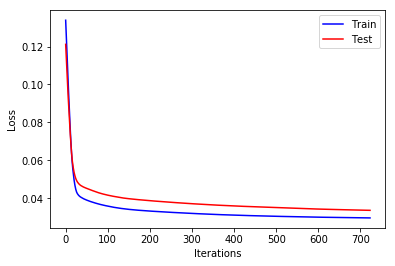

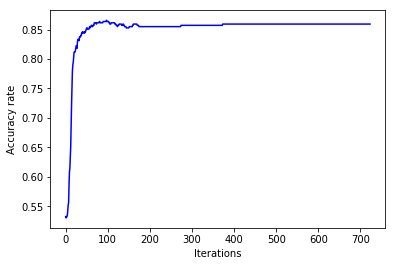

In [1]:
# -*- coding: utf-8 -*-

from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#获取数据
def get_data():
    data = load_svmlight_file('G:\MLcode\data\\australian_scale.txt')
    return data[0], data[1]
X, y = get_data()

#划分数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

#随机初始化模型参数
W = np.random.rand(14, 1)
b = 0
C = 0.1
temp_W = W
temp_b = b

#损失函数L = 0.5*||W||^2 + C∑max(0, 1 - yi(w.T*xi + b))
L_train = []
L_test = []
acc = []
count = 0
L = 0.5 * np.dot(W.transpose(), W)
for i in range(X_train.shape[0]):
    if y_train[i, :] * (X_train[i, :] * W + b) < 1:
        L += C * (1 - y_train[i, :] * (X_train[i, :] * W + b))
L_train.append(L[0, 0]/X_train.shape[0])
L = 0.5 * np.dot(W.transpose(), W)
for i in range(X_test.shape[0]):
    if y_test[i, :] * (X_test[i, :] * W + b) < 1:
        L += C * (1 - y_test[i, :] * (X_test[i, :] * W + b))
L_test.append(L[0, 0]/X_test.shape[0])
mat_train = y_train * (X_train * W + b)
for i in range(mat_train.shape[0]):
    if mat_train[i, 0] >0.08:
        count += 1
acc.append(count/X_train.shape[0])

#学习率
alpha = 0.001

#迭代求最优参数
for i in range(1000):
    count = 0
    #求得所有样本对Loss函数的梯度
    G_W = W
    G_b = 0
    for j in range(X_train.shape[0]):
        if y_train[j, :] * (X_train[j, :] * W + b) < 1:
            w = (X_train[j, :].T * y_train[j, :]).reshape(14, 1)
            G_W = G_W - C * w
            G_b = G_b - C * y_train[j, 0]

    #取梯度的负方向
    D_W = -G_W
    D_b = -G_b
    #更新模型参数
    temp_W = temp_W + alpha * D_W
    temp_b = temp_b + alpha * D_b
    L1 = 0.5 * np.dot(W.transpose(), W)
    for k in range(X_train.shape[0]):
        if y_train[k, :] * (X_train[k, :] * W + b) < 1:
            L1 += C * (1 - y_train[k, :] * (X_train[k, :] * W + b))

    L2 = 0.5 * np.dot(temp_W.transpose(), temp_W)
    for k in range(X_train.shape[0]):
        if y_train[k, :] * (X_train[k, :] * temp_W + temp_b) < 1:
            L2 += C * (1 - y_train[k, :] * (X_train[k, :] * temp_W + temp_b))

    L3 = 0.5 * np.dot(temp_W.transpose(), temp_W)
    for k in range(X_test.shape[0]):
        if y_test[k, :] * (X_test[k, :] * temp_W + temp_b) < 1:
            L3 += C * (1 - y_test[k, :] * (X_test[k, :] * temp_W + temp_b))
    if L1 > L2:
        W = temp_W
        b = temp_b
        L_train.append(L2[0,0]/X_train.shape[0])
        L_test.append(L3[0,0]/X_test.shape[0])
        mat_train = y_train * (X_train * W + b)
        for k in range(mat_train.shape[0]):
            if mat_train[k, 0] > 0.08:
                count += 1
        acc.append(count/X_train.shape[0])
    else:
        break    
plt.xlabel('Iterations')
plt.ylabel('Loss')
a, = plt.plot(L_train, color = 'blue')
b, = plt.plot(L_test, color = 'red')
plt.legend(handles = [a, b], labels = ['Train', 'Test'], loc = 'best')
plt.show()
plt.figure()
plt.xlabel('Iterations')
plt.ylabel('Accuracy rate')
plt.plot(acc, color = 'blue')
plt.show()
